You should be able to `run all cells` and the notebook should execute to completion. Just the train set itself is 18GB so the download of the files might take a while.

You have to make sure the PATH you give below exists and the notebook should be able to take it from there.

[Official website of the COCO dataset](http://cocodataset.org)

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils import *

from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from matplotlib import patches, patheffects

In [3]:
print_info()

Last run on: 2018-03-24
PyTorch version: 0.3.1.post2
fastai version: 0.6


In [4]:
PATH = Path('data/coco2017')

In [11]:
# %%capture
# !wget http://images.cocodataset.org/zips/train2017.zip -P {PATH}
# !wget http://images.cocodataset.org/zips/val2017.zip -P {PATH}
# !wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P {PATH}

In [10]:
# %%capture
# for d in PATH.iterdir():
#     !unzip {d} -d {PATH}

In [21]:
train_anno = json.load((PATH/'annotations/instances_train2017.json').open())

In [26]:
train_anno['images'][:2]

[{'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
  'date_captured': '2013-11-14 11:18:45',
  'file_name': '000000391895.jpg',
  'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
  'height': 360,
  'id': 391895,
  'license': 3,
  'width': 640},
 {'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg',
  'date_captured': '2013-11-14 11:38:44',
  'file_name': '000000522418.jpg',
  'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
  'height': 480,
  'id': 522418,
  'license': 4,
  'width': 640}]

In [39]:
train_anno['annotations'][0]

{'area': 2765.1486500000005,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156,
 'image_id': 558840,
 'iscrowd': 0,
 'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]]}

In [38]:
len(train_anno['images']), len(train_anno['annotations'])

(118287, 860001)

In [40]:
train_anno['categories'][:3]

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'}]

In [41]:
len(train_anno['categories'])

80

In [43]:
idx2cat = {o['id']: o['name'] for o in train_anno['categories']}

In [44]:
get_from_dict(idx2cat, 4)

{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle'}

The point of this notebook is so that I can practice what was covered in [Lecture 8](https://github.com/fastai/fastai/blob/master/courses/dl2/pascal.ipynb) of the Fastai course part 2 v2.

What I am looking for here is really a toy dataset - no point using everything in COCO 2017. Also, I will try to put a twist on what is predicted. 

In [49]:
from collections import Counter

In [51]:
c = Counter(anno['category_id'] for anno in train_anno['annotations'])

In [ ]:
c.most_common()

In [50]:
train_anno['annotations'][:2]

[{'area': 2765.1486500000005,
  'bbox': [199.84, 200.46, 77.71, 70.88],
  'category_id': 58,
  'id': 156,
  'image_id': 558840,
  'iscrowd': 0,
  'segmentation': [[239.97,
    260.24,
    222.04,
    270.49,
    199.84,
    253.41,
    213.5,
    227.79,
    259.62,
    200.46,
    274.13,
    202.17,
    277.55,
    210.71,
    249.37,
    253.41,
    237.41,
    264.51,
    242.54,
    261.95,
    228.87,
    271.34]]},
 {'area': 1545.4213000000007,
  'bbox': [234.22, 317.11, 149.39, 38.55],
  'category_id': 58,
  'id': 509,
  'image_id': 200365,
  'iscrowd': 0,
  'segmentation': [[247.71,
    354.7,
    253.49,
    346.99,
    276.63,
    337.35,
    312.29,
    333.49,
    364.34,
    331.57,
    354.7,
    327.71,
    369.16,
    325.78,
    376.87,
    333.49,
    383.61,
    330.6,
    379.76,
    321.93,
    365.3,
    320.0,
    356.63,
    317.11,
    266.02,
    331.57,
    260.24,
    334.46,
    260.24,
    337.35,
    242.89,
    338.31,
    234.22,
    338.31,
    234.22

In [48]:
train_anno['categories']

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [23]:
train_anno.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [8]:
captions_train2017.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [20]:
len(captions_train2017['annotations'])

591753

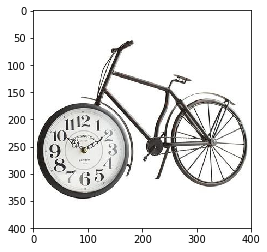

In [19]:
plt.imshow(open_image(PATH/'train2017/000000203564.jpg'))

In [11]:
get_from_dict(captions_train2017['images'], 4)

AttributeError: 'list' object has no attribute 'items'

In [16]:
f = (PATH/'annotations/captions_train2017.json').open()

In [ ]:
f.readline()

In [ ]:
2+2